In [100]:
from collections import defaultdict

import matplotlib.pyplot as plt
from matplotlib import gridspec
from MultiEvalDataset import MultiEvalDataset
import numpy as np

In [2]:
dataset = MultiEvalDataset()

Reusing dataset multi_eurlex (C:\Users\LPavl\.cache\huggingface\datasets\multi_eurlex\all_languages\1.0.0\8ec8b79877a517369a143ead6679d1788d13e51cf641ed29772f4449e8364fb6)


  0%|          | 0/3 [00:00<?, ?it/s]

0.0000% of dataset loaded
10.0000% of dataset loaded
20.0000% of dataset loaded
30.0000% of dataset loaded
40.0000% of dataset loaded
50.0000% of dataset loaded
60.0000% of dataset loaded
70.0000% of dataset loaded
80.0000% of dataset loaded
90.0000% of dataset loaded


In [3]:
df = dataset.data

In [48]:
croatian_dict = dict()
others_dict = dict()

In [49]:
for index, row in df.iterrows():
    lang = row['lang']
    labels = row['labels']
    for label in labels:
        if lang == 'hr':
            if label not in croatian_dict:
                croatian_dict[label] = 0
            croatian_dict[label] += 1
        else:
            if label not in others_dict:
                others_dict[label] = 0
            others_dict[label] += 1

In [50]:
categories = list(range(21))

In [51]:
croatian_vals = [croatian_dict[cat] for cat in categories]
others_vals = [others_dict[cat] for cat in categories]

In [52]:
croatian_sum = sum(croatian_vals)
others_sum = sum(others_vals)

croatian_vals = [val / croatian_sum for val in croatian_vals]
others_vals = [val / others_sum for val in others_vals]

In [132]:
ticks = ["social questions",
         "industry",
         "finance",
         "trade",
         "business and competition",
         "international relations",
         "agriculture, forestry and fisheries",
         "production, technology and research",
         "transport",
         "employment and working conditions",
         "politics",
         "law",
         "education and communications",
         "international organisations",
         "energy",
         "EUROPEAN UNION",
         "science",
         "agri-foodstuffs",
         "geography",
         "economics",
         "environment"]

In [101]:
f1_scores = [0.67, 0.74, 0.85, 0.80, 0.69, 0.80, 0.86, 0.65, 0.86, 0.43, 0.49, 0.59, 0.65, 0.39, 0.75, 0.80, 0.27, 0.95, 0.92, 0.62, 0.62]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


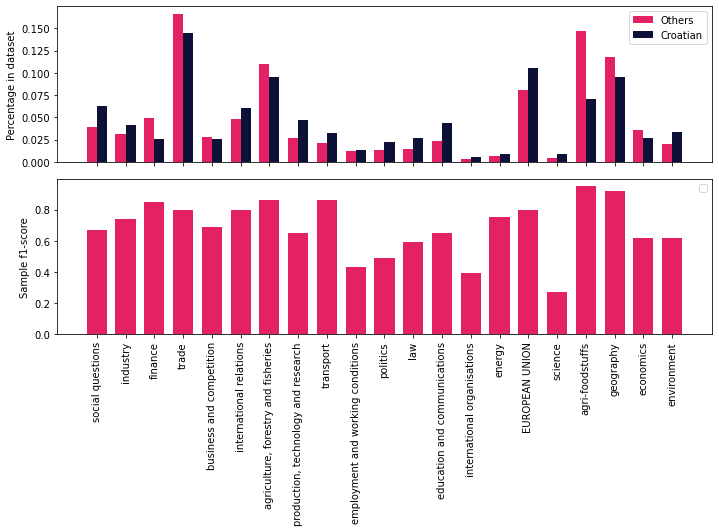

In [99]:
x = np.arange(len(categories))
width = 0.35

fig, (ax1, ax2) = plt.subplots(nrows=2, sharex=True)
fig.set_size_inches(10, 7.5)
fig.subplots_adjust(hspace=.0)
rects1 = ax1.bar(x - width / 2, others_vals, width, label='Others', color='#e52165')
rects2 = ax1.bar(x + width / 2, croatian_vals, width, label='Croatian', color='#0d1137')

ax1.set_ylabel('Percentage in dataset')
ax1.legend()

width = 0.7

fig.set_size_inches(10, 7.5)
rects = ax2.bar(x, f1_scores, width, color='#e52165')

ax2.set_ylabel('Sample f1-score')
ax2.set_xticks(x, ticks, rotation=90)
ax2.legend()

fig.tight_layout()

plt.show()

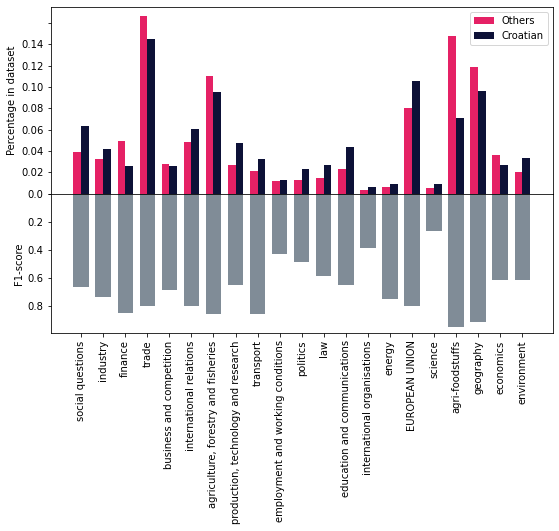

In [140]:
fig = plt.figure()
fig.set_size_inches(9, 6)
gs = gridspec.GridSpec(2, 1, height_ratios=[4, 3])

width = 0.35
ax0 = plt.subplot(gs[0])
ax0.set_ylabel('Percentage in dataset')
rects1 = ax0.bar(x - width / 2, others_vals, width, label='Others', color='#e52165')
rects2 = ax0.bar(x + width / 2, croatian_vals, width, label='Croatian', color='#0d1137')

width = 0.7
ax1 = plt.subplot(gs[1], sharex = ax0)
ax1.set_ylabel('F1-score')
rects = ax1.bar(x, f1_scores, width, color='#808C97')
ax1.invert_yaxis()
plt.setp(ax0.get_xticklabels(), visible=False)

yticks = ax0.yaxis.get_major_ticks()
yticks[0].label1.set_visible(False)

ax1.set_xticks(x, ticks, rotation=90)
ax0.legend((rects1, rects2), ('Others', 'Croatian'), loc='upper right')

plt.subplots_adjust(hspace=.0)
plt.show()